In [ ]:
import random
import numpy as np
import time

size = 10**7

data_list = [random.random() for _ in range(size)]
data_numpy = np.array(data_list)

def operate_time(operation_func):
    start_time = time.time()
    result = operation_func()
    elapsed_time = time.time() - start_time
    return elapsed_time

print("\n для списка Python:")
print(f"сумма: {sum(data_list)}")
print(f"время вычисления {operate_time(lambda: sum(data_list))} секунд")

print(f"среднее: {sum(data_list) / len(data_list)}")
print(f"время вычисления{operate_time(lambda: sum(data_list) / len(data_list))} секунд")

print("\n массива NumPy:")
print(f"сумма: {np.sum(data_numpy)}")
print(f"время вычисления {operate_time(lambda: np.sum(data_numpy))} секунд")

print(f"среднее: {np.mean(data_numpy)}")
print(f"время вычисления{operate_time(lambda: np.mean(data_numpy))} секунд")

print(f"\nразность времени для суммы: {operate_time(lambda: sum(data_list)) - operate_time(lambda: np.sum(data_numpy))}")
print(f"\nразность времени для среднего числа: {operate_time(lambda: sum(data_list) / len(data_list)) - operate_time(lambda: np.mean(data_numpy))}")


 для списка Python:
сумма: 5000787.010440996
время вычисления 0.11972212791442871 секунд
среднее: 0.5000787010440996
время вычисления0.09242987632751465 секунд

 массива NumPy:
сумма: 5000787.010441456
время вычисления 0.009751081466674805 секунд
среднее: 0.5000787010441456
время вычисления0.008454084396362305 секунд

разность времени для суммы: 0.09208440780639648

разность времени для среднего числа: 0.08465027809143066


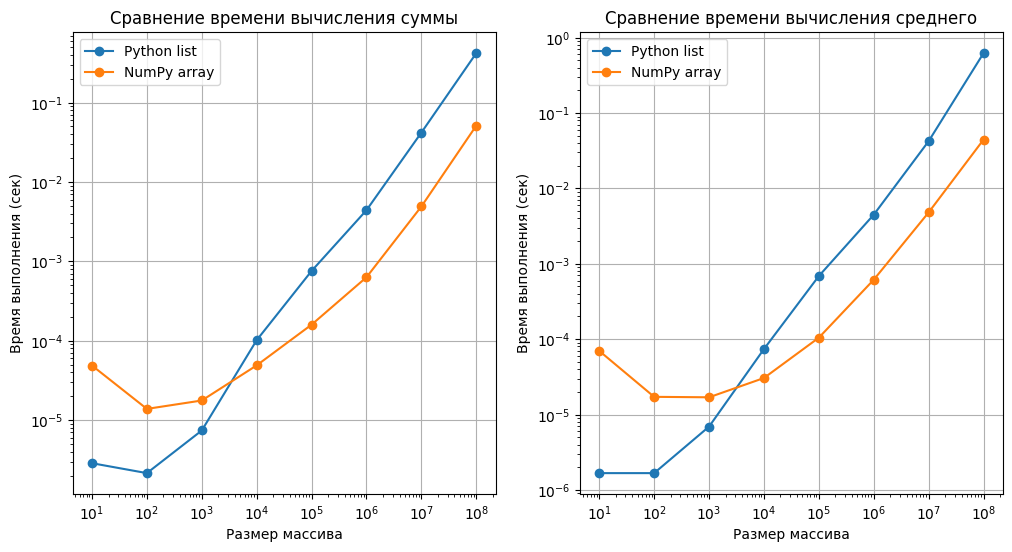

In [ ]:
import random
import numpy as np
import time
import matplotlib.pyplot as plt

def operate_time(operation_func):
    start_time = time.time()
    result = operation_func()
    elapsed_time = time.time() - start_time
    return elapsed_time

sizes = [10**i for i in range(1, 9)]

time_sum_list = []
time_mean_list = []
time_sum_numpy = []
time_mean_numpy = []

for size in sizes:
    data_list = [random.random() for _ in range(size)]
    data_numpy = np.array(data_list)

    time_sum_list.append(operate_time(lambda: sum(data_list)))
    time_mean_list.append(operate_time(lambda: sum(data_list) / len(data_list)))

    time_sum_numpy.append(operate_time(lambda: np.sum(data_numpy)))
    time_mean_numpy.append(operate_time(lambda: np.mean(data_numpy)))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sizes, time_sum_list, label="Python list", marker='o')
plt.plot(sizes, time_sum_numpy, label="NumPy array", marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Размер массива")
plt.ylabel("Время выполнения (сек)")
plt.title("Сравнение времени вычисления суммы")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sizes, time_mean_list, label="Python list", marker='o')
plt.plot(sizes, time_mean_numpy, label="NumPy array", marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Размер массива")
plt.ylabel("Время выполнения (сек)")
plt.title("Сравнение времени вычисления среднего")
plt.legend()
plt.grid(True)

plt.show()

Верхний левый угол (x, y): -800, 800
Правый нижний (x, y): 25, 25


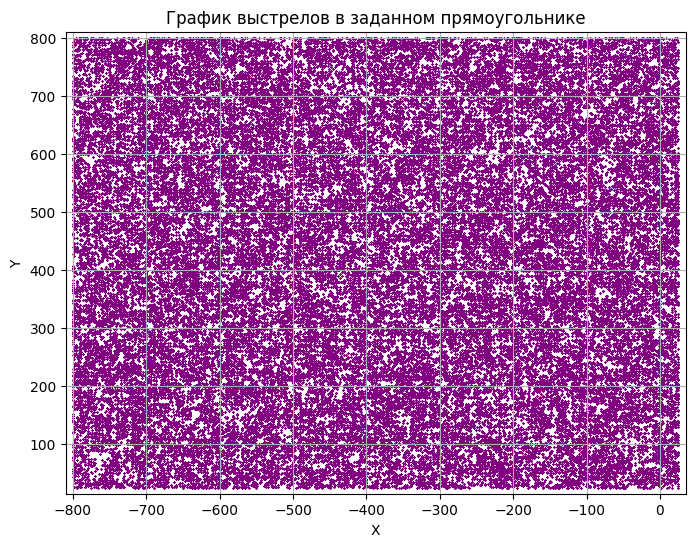

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

with open('data.csv', 'r') as file:
    lines = file.readlines()

try:
    top_left_x, top_left_y = map(int, input("Верхний левый угол (x, y): ").split(','))
    bottom_right_x, bottom_right_y = map(int, input("Правый нижний (x, y): ").split(','))
except ValueError:
    print("Noncorrect value")
    exit()

coordinates = []

for line in lines[1:]:
    parts = line.strip().split(',')
    if len(parts) == 2:
        x, y = map(int, parts)
        coordinates.append({'x': x, 'y': y})

df = pd.DataFrame(coordinates)

filtered_df = df[
    (df['x'] >= top_left_x) & (df['x'] <= bottom_right_x) &
    (df['y'] >= bottom_right_y) & (df['y'] <= top_left_y)
]

plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['x'], filtered_df['y'], color="purple", marker='x', s=1)
plt.title('График выстрелов в заданном прямоугольнике')
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(top_left_x-10, bottom_right_x+10)
plt.ylim(bottom_right_y-10, top_left_y+10)

plt.grid(True)
plt.show()